In [1]:
import numpy as np
import pandas as pd
import pickle
import yaml
import matplotlib.pyplot as plt

In [2]:
# Lname = "Sharpe"
Lname = "Vol"
# Lname = "Wealth"

# stream = open(r"C:\optimal\CBO_online_opt\config.yaml", 'rb')
# stream = open(r"../config.yaml", 'r')
stream = open(r"../config_Rast.yaml", 'r')
config = yaml.full_load(stream)

total = 12
avg_loss_RCBO = np.zeros(total)
avg_loss_RCBO_std = np.zeros(total)
avg_loss_ADAM = np.zeros(total)
avg_loss_ADAM_std = np.zeros(total)

for exNum in range(total):
    path = "20240530_ADAM_RCBO_RastD50"
    avg_loss = 0.0
    for spNum in range(100):
        A= path + '_'+str(exNum)+'/'
        filename = A + 'avg_loss'+'_' +str(spNum) + ".pkl"
        with open(filename, 'rb') as f:
            tmp = pickle.load(f)
            tmp = np.min(tmp)
        avg_loss += tmp
        tmp3 = np.zeros(10000)
        for spNum2 in range(100):
            with open("20240214_RCBO_RastD50_0/"+'avg_loss_'+str(spNum2)+'.pkl', 'rb') as f:
                tmp2 = pickle.load(f)
                tmp2 = np.min(tmp2)
                tmp3[100*spNum+spNum2] = tmp/tmp2
    avg_loss = avg_loss/100
    avg_loss_ADAM[exNum] = avg_loss
    avg_loss_ADAM_std[exNum] = np.std(tmp3)
    
    path = "20240214_RCBO_RastD50"
    avg_loss = 0.0
    for spNum in range(100):
        A= path + '_'+str(exNum)+'/'
        filename = A + 'avg_loss'+'_' +str(spNum) + ".pkl"
        with open(filename, 'rb') as f:
            tmp = pickle.load(f)
            tmp = np.min(tmp)
        avg_loss += tmp
        tmp3 = np.zeros(10000)
        for spNum2 in range(100):
            with open("20240214_RCBO_RastD50_0/"+'avg_loss_'+str(spNum2)+'.pkl', 'rb') as f:
                tmp2 = pickle.load(f)
                tmp2 = np.min(tmp2)
                tmp3[100*spNum+spNum2] = tmp/tmp2
    avg_loss = avg_loss/100
    avg_loss_RCBO[exNum] = avg_loss
    avg_loss_RCBO_std[exNum] = np.std(tmp3)
avg_loss_RCBO_std[0] = 0.0

print(avg_loss_ADAM)
print(avg_loss_RCBO)

[9.08532912 3.69999941 2.15315563 2.04098248 2.22016315 3.10202367
 6.60424531 8.47345069 9.02202726 9.34698505 9.62563904 9.72612208]
[10.96158638  8.55762656  7.40149718  6.90704205  6.07693306  4.68470597
  3.44732904  2.71607745  2.11885778  1.60727688 18.45115256 18.74182853]


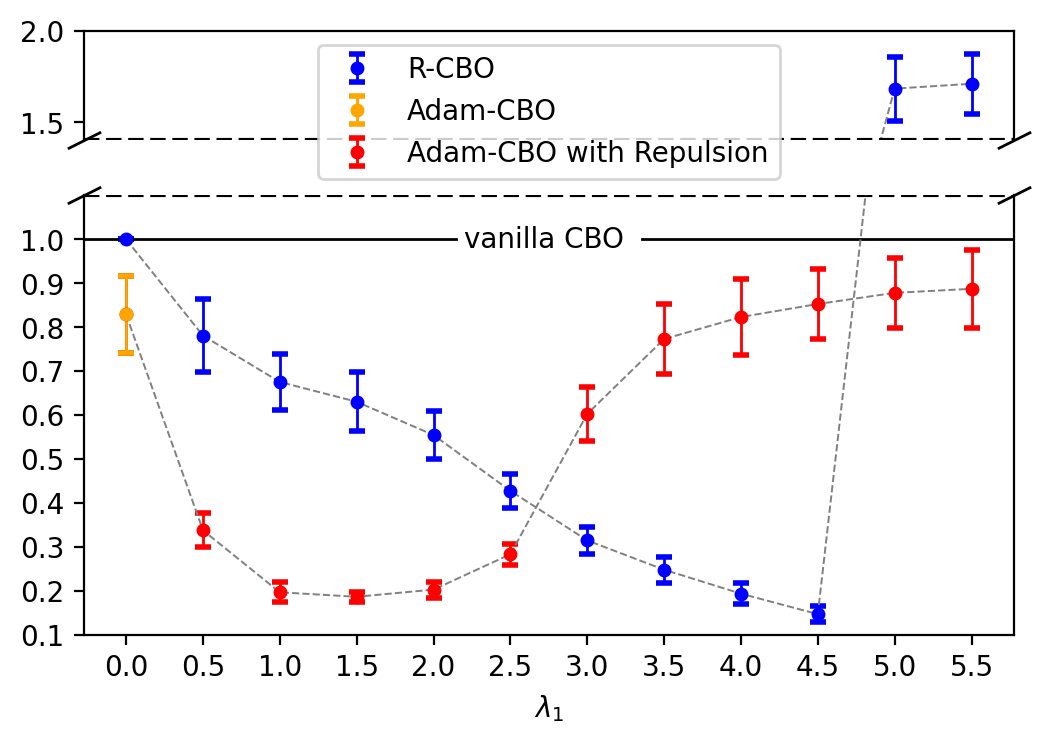

In [5]:
x = np.arange(0,12.0)
x = x/2.0

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 4]}, dpi = 200) # 그래프 두 개를 한 figure 내에 그리기
ax1.errorbar(x, avg_loss_RCBO/avg_loss_RCBO[0], yerr = avg_loss_RCBO_std,
             marker='o', ## 라인 마커
             markersize = 4,
             ls = 'None',
             markerfacecolor = 'b',
             markeredgecolor = 'b',
             color='grey', ## 라인 색상
             ecolor='b', ## 에러 바 라인 색상
             elinewidth=1, ## 에러 바 라인 두께
             capsize=3, ## 에러 바 양끝 막대 길이
             capthick=2, ## 에러 바 양끝 막대 두께
             label = 'R-CBO'
            )
ax1.plot(x, avg_loss_RCBO/avg_loss_RCBO[0], ls = '--', linewidth = 0.7, color = 'grey')
ax1.errorbar(x[0], avg_loss_ADAM[0]/avg_loss_RCBO[0], yerr = avg_loss_ADAM_std[0],
             marker='o', ## 라인 마커
             markersize = 4,
             markerfacecolor = 'orange',
             markeredgecolor = 'orange',
             ls = 'None',
             ecolor='orange', ## 에러 바 라인 색상
             elinewidth=1, ## 에러 바 라인 두께
             capsize=3, ## 에러 바 양끝 막대 길이
             capthick=2, ## 에러 바 양끝 막대 두께
             label = 'Adam-CBO'
            )
ax1.errorbar(x, avg_loss_ADAM/avg_loss_RCBO[0], yerr = avg_loss_ADAM_std,
             marker='o', ## 라인 마커
             markersize = 4,
             ls = 'None',
             markerfacecolor = 'r',
             markeredgecolor = 'r',
             color='grey', ## 라인 색상
             ecolor='r', ## 에러 바 라인 색상
             elinewidth=1, ## 에러 바 라인 두께
             capsize=3, ## 에러 바 양끝 막대 길이
             capthick=2, ## 에러 바 양끝 막대 두께
             label = 'Adam-CBO with Repulsion'
            )
ax2.errorbar(x, avg_loss_RCBO/avg_loss_RCBO[0], yerr = avg_loss_RCBO_std,
             marker='o', ## 라인 마커
             markersize = 4,
             ls = '--',
             linewidth = 0.7,
             markerfacecolor = 'b',
             markeredgecolor = 'b',
             color='grey', ## 라인 색상
             ecolor='b', ## 에러 바 라인 색상
             elinewidth=1, ## 에러 바 라인 두께
             capsize=3, ## 에러 바 양끝 막대 길이
             capthick=2, ## 에러 바 양끝 막대 두께
            )
ax2.errorbar(x, avg_loss_ADAM/avg_loss_RCBO[0], yerr = avg_loss_ADAM_std,
             marker='o', ## 라인 마커
             markersize = 4,
             ls = '--',
             linewidth = 0.7,
             markerfacecolor = 'r',
             markeredgecolor = 'r',
             color='grey', ## 라인 색상
             ecolor='r', ## 에러 바 라인 색상
             elinewidth=1, ## 에러 바 라인 두께
             capsize=3, ## 에러 바 양끝 막대 길이
             capthick=2, ## 에러 바 양끝 막대 두께
            )
ax2.errorbar(x[0], avg_loss_ADAM[0]/avg_loss_RCBO[0], yerr = avg_loss_ADAM_std[0],
             marker='o', ## 라인 마커
             markersize = 4,
             markerfacecolor = 'orange',
             markeredgecolor = 'orange',
             ecolor='orange', ## 에러 바 라인 색상
             elinewidth=1, ## 에러 바 라인 두께
             capsize=3, ## 에러 바 양끝 막대 길이
             capthick=2, ## 에러 바 양끝 막대 두께
            )
omitL = 1.1
omitU = 1.4
ax1.set_ylim(omitU, 2.0)
ax2.set_ylim(0.1, omitL)
ax1.legend(loc = "upper center")

plt.xticks(x, x)
plt.yticks(np.arange(1, 11)/10, np.arange(1, 11)/10)
plt.xlabel(r'$\lambda_1$')
plt.axhline(y=1, xmax = 0.4, color='black', linestyle = 'solid', linewidth = 1)
plt.text(2.2, 1, 'vanilla CBO', ha='left', va='center')
plt.axhline(y=1, xmin = 0.6, color='black', linestyle = 'solid', linewidth = 1)

# 두 그래프 사이의 경계선 제거
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(bottom=False)

# 두 그래프 사이의 y축에 물결선 효과 마커 표시
kwargs = dict(marker=[(-1, -0.5), (1, 0.5)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.axhline(y=omitL, color='black', linestyle = 'dashed')
ax1.axhline(y=omitU, color='black', linestyle = 'dashed')

plt.savefig('rast50D.png')